# M5 Mobile Legends Analysis
by: @mufiiin

## A. Prepare Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
url = "https://raw.githubusercontent.com/fadhiljr7/datascience002/main/M5_World_Championship.csv"
df = pd.read_csv(url)

## B. Exploratory Data Analysis

### 1. Data Information

In [ ]:
df.head()

,Index,Hero,T_Picked,T_Wins,T_Loses,T_WinRate,T_PickPercentage,BS_Picked,BS_Wins,BS_Loses,...,RS_Loses,RS_WinRate,T_Banned,T_BansPercentage,T_PicksBans,T_PicksBansPercentage,Played By,Played With,Played Vs.,Roles
0,1,Valentina,727,334,393,45.94,52.00,348,157,191,...,202,46.70,484,34.62,1211,86.62,19 (11-8)19 (10-9)19 (10-9)19 (7-12)17 (8-9),164 (83-81) 162 (79-83) 140 (71-69) 121 (58-6...,218 (85-133) 178 (68-110) 174 (77-97) 173 (82...,Mage
1,2,Fredrinn,726,383,343,52.75,51.93,361,184,177,...,166,54.52,475,33.98,1201,85.91,21 (15-6)18 (14-4)18 (12-6)18 (9-9)17 (10-7),164 (83-81) 131 (81-50) 126 (69-57) 122 (69-5...,218 (133-85) 190 (106-84) 185 (79-106) 173 (8...,Support
2,3,Terizla,620,348,272,56.13,44.35,291,168,123,...,149,54.71,435,31.12,1055,75.46,22 (12-10)18 (10-8)15 (9-6)14 (10-4)14 (8-6),162 (79-83) 114 (76-38) 108 (56-52) 105 (49-5...,185 (106-79) 178 (110-68) 132 (70-62) 119 (65...,Fighter
3,4,Edith,527,265,262,50.28,37.70,258,125,133,...,129,52.04,477,34.12,1004,71.82,14 (9-5)14 (9-5)14 (6-8)13 (10-3)13 (9-4),122 (69-53) 112 (48-64) 109 (55-54) 100 (42-5...,174 (97-77) 147 (76-71) 132 (62-70) 108 (51-5...,Tank
4,5,Irithel,502,255,247,50.80,35.91,245,129,116,...,131,49.03,208,14.88,710,50.79,16 (8-8)15 (10-5)15 (10-5)12 (7-5)12 (7-5),140 (71-69) 126 (69-57) 108 (56-52) 100 (42-5...,145 (73-72) 132 (60-72) 120 (68-52) 110 (47-6...,Marksman


In [ ]:
df.shape

(115, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Index                  115 non-null    int64  
 1   Hero                   115 non-null    object 
 2   T_Picked               115 non-null    int64  
 3   T_Wins                 115 non-null    int64  
 4   T_Loses                115 non-null    int64  
 5   T_WinRate              115 non-null    object 
 6   T_PickPercentage       115 non-null    float64
 7   BS_Picked              115 non-null    int64  
 8   BS_Wins                115 non-null    int64  
 9   BS_Loses               115 non-null    int64  
 10  BS_WinRate             115 non-null    object 
 11  RS_Picked              115 non-null    int64  
 12  RS_Wins                115 non-null    int64  
 13  RS_Loses               115 non-null    int64  
 14  RS_WinRate             115 non-null    object 
 15  T_Bann

In [5]:
df['T_WinRate'] = pd.to_numeric(df['T_WinRate'], errors='coerce')
df['BS_WinRate'] = pd.to_numeric(df['BS_WinRate'], errors='coerce')
df['RS_WinRate'] = pd.to_numeric(df['RS_WinRate'], errors='coerce')

In [ ]:
df.isnull().sum()

,0
Index,0
Hero,0
T_Picked,0
T_Wins,0
T_Loses,0
T_WinRate,2
T_PickPercentage,0
BS_Picked,0
BS_Wins,0
BS_Loses,0


### 2. Visualize the Distribution of Numeric & Categorical Column

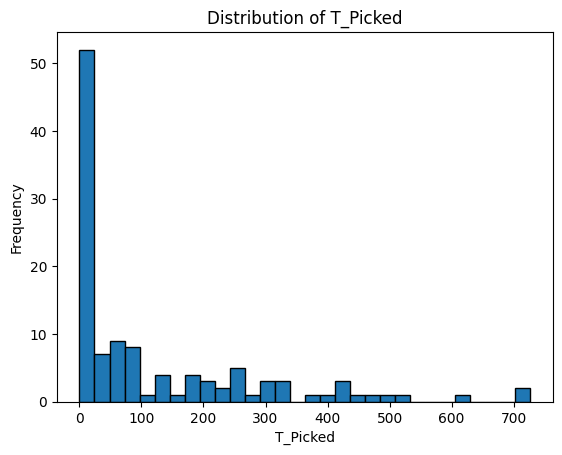

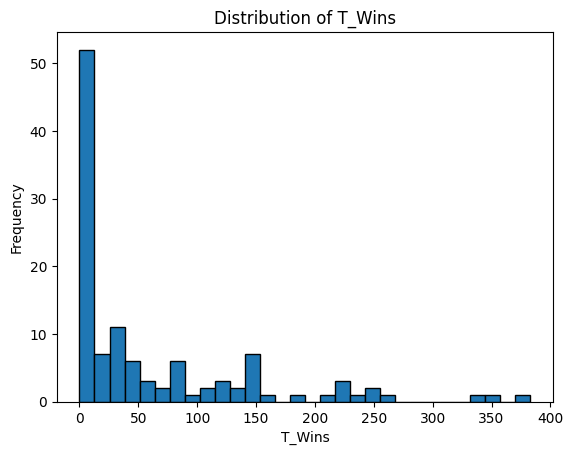

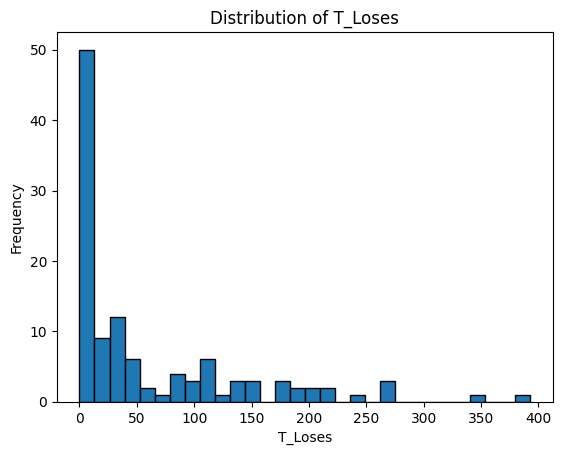

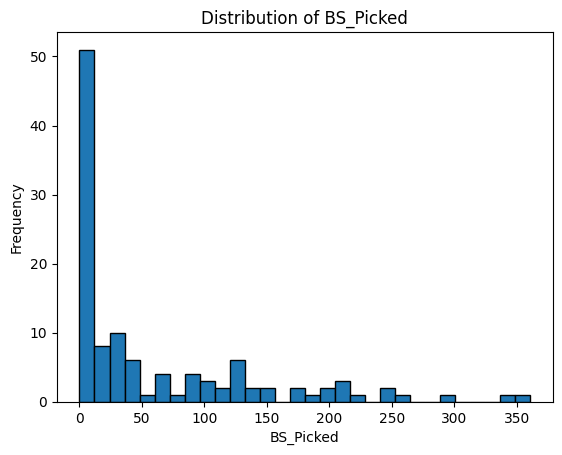

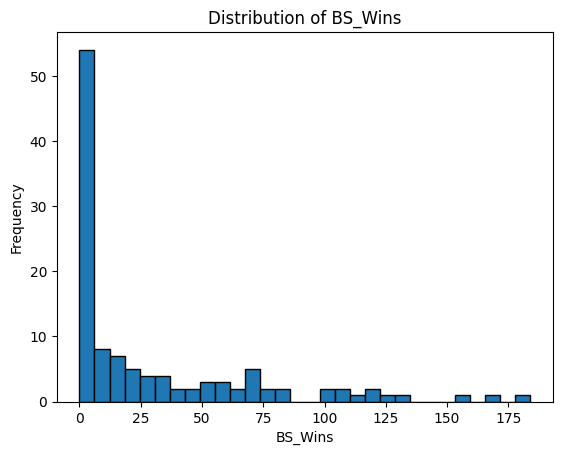

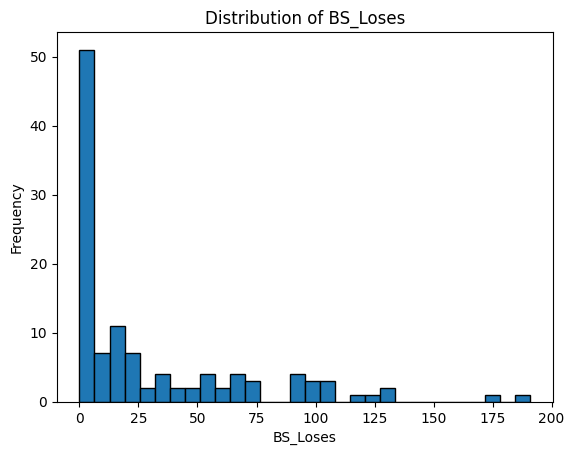

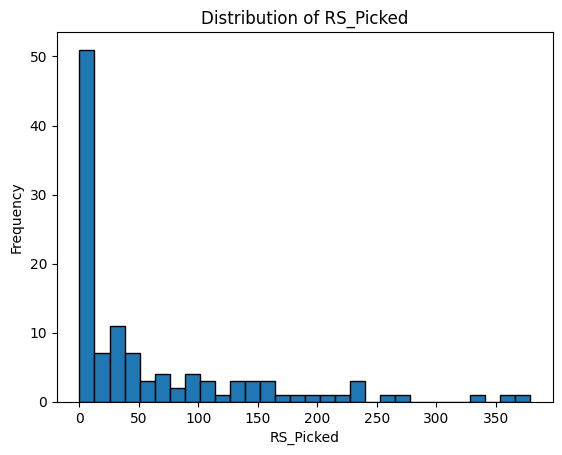

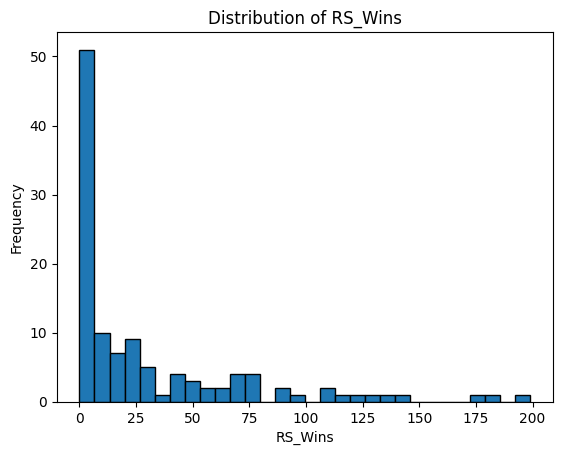

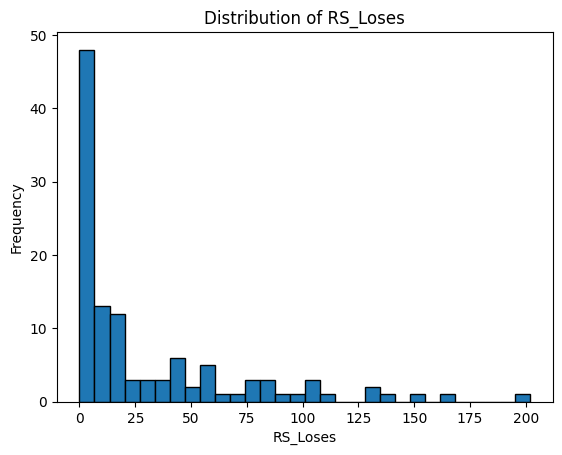

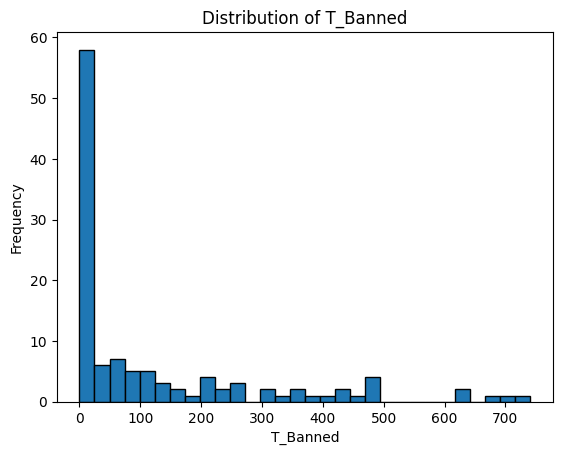

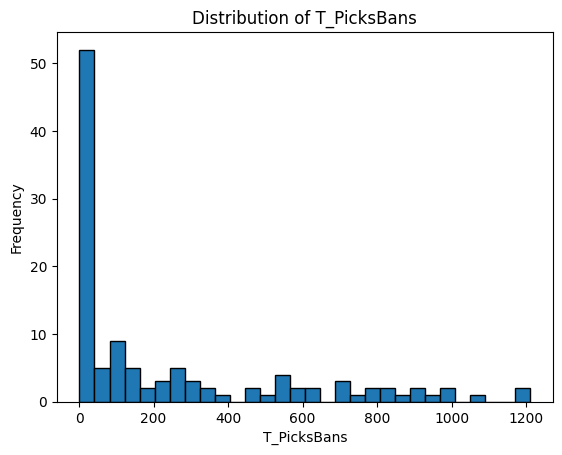

In [ ]:
numeric_columns = ['T_Picked', 'T_Wins', 'T_Loses', 'BS_Picked', 'BS_Wins', 'BS_Loses',
                   'RS_Picked', 'RS_Wins', 'RS_Loses', 'T_Banned', 'T_PicksBans']

for column in numeric_columns:
    plt.hist(df[column], bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df_wr = df.sort_values('T_WinRate')

fig = px.bar(
    df_wr,
    x='Hero',
    y='T_WinRate',
    color='T_WinRate',
    labels={"T_WinRate":"Win Rate"},
    title='The Distribution of Overall Win Rates'
)
fig.show()

In [ ]:
role_counts = df['Roles'].value_counts().reset_index()
fig = px.bar(
    role_counts,
    x='count',
    y='Roles',
    labels={'count': 'Role', 'Role': 'Count'},
    title='Distribution of Hero Roles in the Dataset',
)
fig.update_layout(
    yaxis=dict(title='Count'),
)
fig.show()

In [ ]:
avg_win_rate_by_role = df.groupby('Roles')['T_WinRate'].mean().reset_index().sort_values(by='T_WinRate')
fig = px.bar(avg_win_rate_by_role, x='Roles', y='T_WinRate',
             title='Average Win Rate by Hero Role',
             labels={'Roles': 'Hero Roles', 'T_WinRate': 'Average Win Rate'},
             color='T_WinRate',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Hero Roles', yaxis_title='Average Win Rate')
fig.show()

In [ ]:
fig = px.bar(df.sort_values(by='T_BansPercentage'), x='Hero', y='T_BansPercentage',
             title='Overall Ban Percentage for Each Hero',
             labels={'Hero': 'Heroes', 'T_BansPercentage': 'Ban Percentage'},
             color='T_BansPercentage',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Heroes', yaxis_title='Ban Percentage')
fig.show()

In [ ]:
fig = px.bar(df.sort_values(by='T_PicksBansPercentage'), x='Hero', y='T_PicksBansPercentage',
             title='Heroes with High Pick and Ban Percentages',
             labels={'Hero': 'Heroes', 'T_PicksBansPercentage': 'Pick and Ban Percentage'},
             color='T_PicksBansPercentage',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Heroes', yaxis_title='Pick and Ban Percentage')
fig.show()

### 3. Statistics

In [ ]:
numeric_columns = ['T_Picked', 'T_Wins', 'T_Loses', 'BS_Picked', 'BS_Wins', 'BS_Loses',
                   'RS_Picked', 'RS_Wins', 'RS_Loses', 'T_Banned', 'T_PicksBans']

for column in numeric_columns:
    print(f"Statistics for {column}:")
    print(df[column].describe())
    print("\n" + "-"*50 + "\n")

Statistics for T_Picked:
count    115.000000
mean     121.521739
std      165.790946
min        0.000000
25%        6.000000
50%       43.000000
75%      193.000000
max      727.000000
Name: T_Picked, dtype: float64

--------------------------------------------------

Statistics for T_Wins:
count    115.000000
mean      60.739130
std       84.578842
min        0.000000
25%        3.000000
50%       25.000000
75%       89.000000
max      383.000000
Name: T_Wins, dtype: float64

--------------------------------------------------

Statistics for T_Loses:
count    115.000000
mean      60.782609
std       82.061250
min        0.000000
25%        4.000000
50%       22.000000
75%      101.000000
max      393.000000
Name: T_Loses, dtype: float64

--------------------------------------------------

Statistics for BS_Picked:
count    115.000000
mean      60.739130
std       82.204397
min        0.000000
25%        3.000000
50%       20.000000
75%      101.500000
max      361.000000
Name: BS_Pick

In [ ]:
grouped_stats = df.groupby('Roles').agg({
    'T_Picked': ['mean', 'sum'],
    'T_WinRate': 'mean',
    'BS_WinRate': 'mean',
    'RS_WinRate': 'mean',
    'T_BansPercentage': 'mean'
})

print(grouped_stats)

                       T_Picked         T_WinRate BS_WinRate  RS_WinRate  \
                           mean   sum        mean       mean        mean   
Roles                                                                      
Assassin              67.300000   673   54.731000  41.720000   59.645000   
Assassin / Mage       11.000000    22   39.165000  58.335000   31.250000   
Fighter              126.904762  2665   43.400000  37.190000   46.268571   
Fighter / Mage        15.000000    30   22.415000  20.000000   25.000000   
Fighter / Support     12.000000    12   33.330000  16.670000   50.000000   
Fighter / Tank        54.333333   326   43.008333  36.951667   44.816667   
Mage                 112.592593  3040   42.239630  42.969630   42.642593   
Mage / Assassin        4.000000     4   25.000000   0.000000  100.000000   
Mage / Support         3.000000     3   66.670000   0.000000  100.000000   
Mage / Tank           72.000000    72   43.060000  43.240000   42.860000   
Marksman    

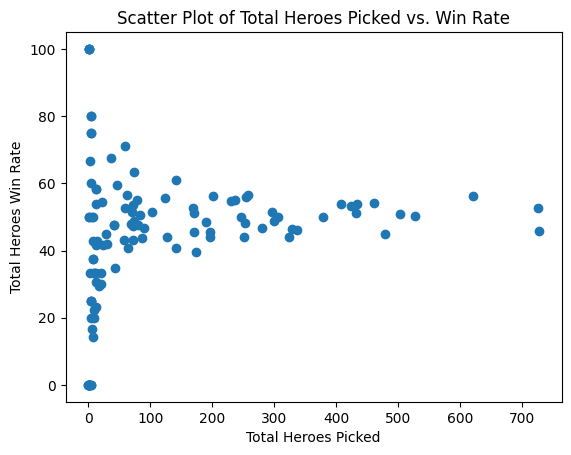

In [ ]:
plt.scatter(df['T_Picked'], df['T_WinRate'])
plt.xlabel('Total Heroes Picked')
plt.ylabel('Total Heroes Win Rate')
plt.title('Scatter Plot of Total Heroes Picked vs. Win Rate')
plt.show()

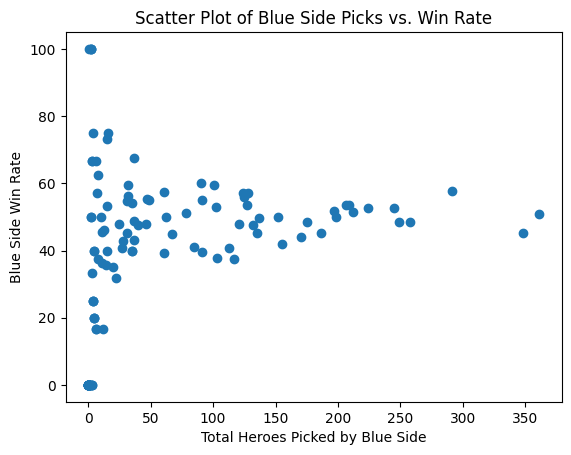

In [ ]:
plt.scatter(df['BS_Picked'], df['BS_WinRate'])
plt.xlabel('Total Heroes Picked by Blue Side')
plt.ylabel('Blue Side Win Rate')
plt.title('Scatter Plot of Blue Side Picks vs. Win Rate')
plt.show()

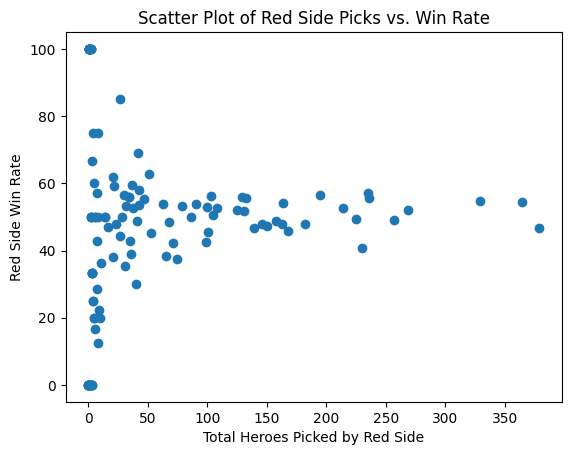

In [ ]:
plt.scatter(df['RS_Picked'], df['RS_WinRate'])
plt.xlabel('Total Heroes Picked by Red Side')
plt.ylabel('Red Side Win Rate')
plt.title('Scatter Plot of Red Side Picks vs. Win Rate')
plt.show()

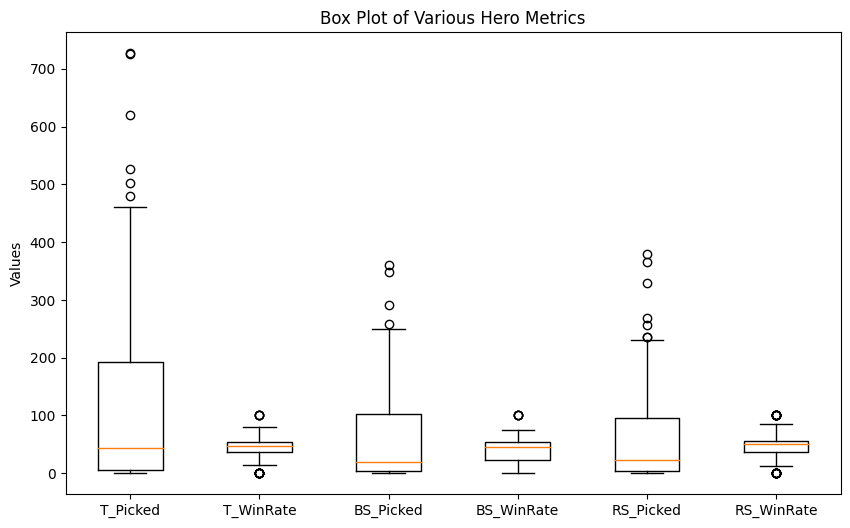

In [ ]:
df[numeric_columns] = df[numeric_columns].replace([float('inf'), -float('inf')], pd.NA)
df[numeric_columns] = df[numeric_columns].fillna(0)

plt.figure(figsize=(10, 6))
plt.boxplot([df[col] for col in numeric_columns], labels=numeric_columns)
plt.ylabel('Values')
plt.title('Box Plot of Various Hero Metrics')
plt.show()

In [ ]:
fig = px.scatter_matrix(df, dimensions=['T_Picked', 'T_Banned', 'T_WinRate'],
                        title='Scatter Plot Matrix of Picks, Bans, and Win Rates',
                        color='T_WinRate',
                        color_continuous_scale='Viridis')

fig.show()

In [ ]:
fig = px.scatter(df, x='T_Picked', y='T_WinRate',
                 title='Win Rate vs. Total Games Played',
                 labels={'Total_Games': 'Total Games Played', 'T_WinRate': 'Win Rate'},
                 trendline='ols',
                 color='T_WinRate',
                 color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Total Games Played', yaxis_title='Win Rate')
fig.show()

fig = px.scatter(df, x='T_Picked', y='T_BansPercentage',
                 title='Ban Percentage vs. Total Games Played',
                 labels={'T_Picked': 'Total Games Played', 'T_BansPercentage': 'Ban Percentage'},
                 trendline='ols',
                 color='T_BansPercentage',
                 color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Total Games Played', yaxis_title='Ban Percentage')
fig.show()

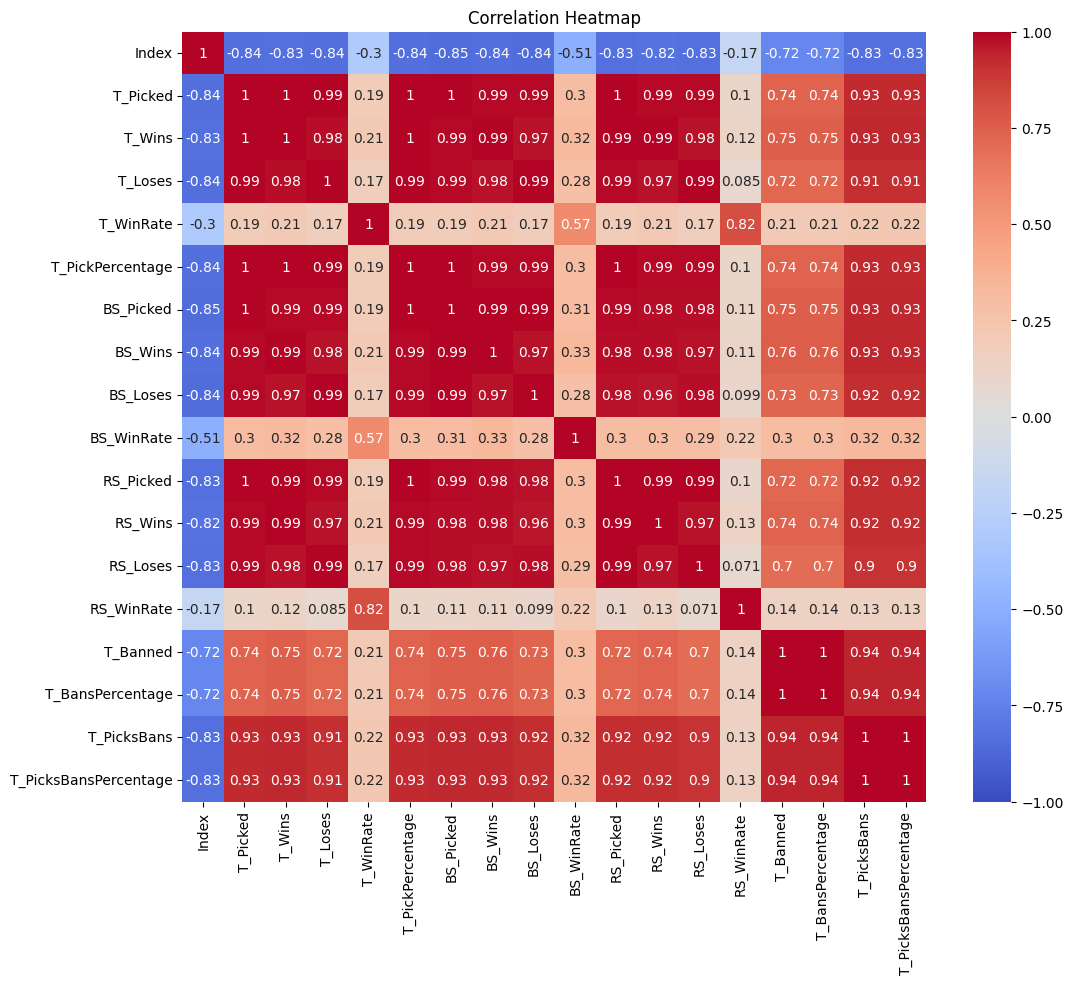

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## C. Cleansing Data

In [ ]:
df['T_WinRate'] = df['T_WinRate'].fillna(0)

In [ ]:
df = df[df['T_WinRate'] != 0]

In [ ]:
df.drop(['Index', 'Played By', 'Played With','Played Vs.'], axis=1,inplace=True)

In [ ]:
df.head()

,Hero,T_Picked,T_Wins,T_Loses,T_WinRate,T_PickPercentage,BS_Picked,BS_Wins,BS_Loses,BS_WinRate,RS_Picked,RS_Wins,RS_Loses,RS_WinRate,T_Banned,T_BansPercentage,T_PicksBans,T_PicksBansPercentage,Roles
0,Valentina,727,334,393,45.94,52.00,348,157,191,45.11,379,177,202,46.70,484,34.62,1211,86.62,Mage
1,Fredrinn,726,383,343,52.75,51.93,361,184,177,50.97,365,199,166,54.52,475,33.98,1201,85.91,Support
2,Terizla,620,348,272,56.13,44.35,291,168,123,57.73,329,180,149,54.71,435,31.12,1055,75.46,Fighter
3,Edith,527,265,262,50.28,37.70,258,125,133,48.45,269,140,129,52.04,477,34.12,1004,71.82,Tank
4,Irithel,502,255,247,50.80,35.91,245,129,116,52.65,257,126,131,49.03,208,14.88,710,50.79,Marksman


## D. Machine Learning Model

In [ ]:
label_encoder = LabelEncoder()
df['Hero'] = label_encoder.fit_transform(df['Hero'])

X = df[['Hero', 'T_Picked', 'BS_Picked', 'RS_Picked', 'T_Banned']]
y = df['T_WinRate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

model = XGBRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.01, random_state=42, max_depth=3)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 85.91%


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.034498932789296485
Root Mean Squared Error (RMSE): 0.18573888335320768
R-squared (R²): 0.8591293577770394


## E. Fun Query

In [3]:
hero_most_picked_highest_winrate = df.sort_values(['T_Picked', 'T_WinRate'], ascending=[False, False]).iloc[0]
print(hero_most_picked_highest_winrate[['Hero', 'T_Picked', 'T_WinRate']])

Hero         Valentina
T_Picked           727
T_WinRate        45.94
Name: 0, dtype: object


In [6]:
hero_most_picked_lowest_winrate = df[df['T_WinRate'] > 0].sort_values(['T_Picked', 'T_WinRate'], ascending=[False, True]).iloc[0]
print(hero_most_picked_lowest_winrate[['Hero', 'T_Picked', 'T_WinRate']])

Hero         Valentina
T_Picked           727
T_WinRate        45.94
Name: 0, dtype: object


In [7]:
hero_most_banned = df.groupby('Hero')['T_Banned'].sum().idxmax()
total_bans = df.groupby('Hero')['T_Banned'].sum().max()
print(f"Hero: {hero_most_banned}, Total Bans: {total_bans}")

Hero: Angela, Total Bans: 741


In [8]:
hero_most_picked = df.groupby('Hero')['T_Picked'].sum().idxmax()
total_picks = df.groupby('Hero')['T_Picked'].sum().max()
print(f"Hero: {hero_most_picked}, Total Picks: {total_picks}")

Hero: Valentina, Total Picks: 727
